In [ ]:
import pandas as pd

In [ ]:
pov = pd.read_csv('data/pobreza.csv')

In [ ]:
pov.columns

Index(['SERIALNO', 'SPORDER', 'PWGTP', 'WGTP', 'AGEP', 'CIT', 'REL', 'SCH',
       'SCHG', 'SCHL', 'SEX', 'ESR', 'LANX', 'ENG', 'MSP', 'MAR', 'WKW',
       'WKHP', 'DIS', 'JWTR', 'NP', 'TEN', 'HHT', 'AgeCateg', 'Boro',
       'CitizenStatus', 'EducAttain', 'EST_Childcare', 'EST_Commuting',
       'EST_EITC', 'EST_FICAtax', 'EST_HEAP', 'EST_Housing', 'EST_IncomeTax',
       'EST_MOOP', 'EST_Nutrition', 'EST_PovGap', 'EST_PovGapIndex',
       'Ethnicity', 'FamType_PU', 'FTPTWork', 'INTP_adj', 'MRGP_adj',
       'NYCgov_Income', 'NYCgov_Pov_Stat', 'NYCgov_REL', 'NYCgov_Threshold',
       'Off_Pov_Stat', 'Off_Threshold', 'OI_adj', 'PA_adj', 'Povunit_ID',
       'Povunit_Rel', 'PreTaxIncome_PU', 'RETP_adj', 'RNTP_adj', 'SEMP_adj',
       'SSIP_adj', 'SSP_adj', 'TotalWorkHrs_PU', 'WAGP_adj'],
      dtype='object')

In [ ]:
pov["NYCgov_Pov_Stat"].unique()

array([2, 1])

### _Filtro #1_

Las variables mencionadas proporcionan una amplia gama de información sobre el contexto socioeconómico de las poblaciones analizadas. Por ejemplo, `Borough` (Distrito) permite entender las disparidades geográficas en términos de recursos y acceso a servicios. `EducAttain` (Nivel educativo) revela el nivel de educación alcanzado por los individuos, lo cual está correlacionado con oportunidades laborales y económicas. El `Índice de brecha de pobreza` (`EST_PovGapIndex`) profundiza en la comprensión de la pobreza, considerando no solo los ingresos absolutos sino también la desigualdad. `Ethnicity` (Etnicidad) proporciona información sobre la diversidad cultural y posibles desafíos relacionados con la inclusión social. `FTPTWork` (Tiempo completo/parcial) y `TotalWorkHrs_PU` (Horas de trabajo promedio) ofrecen una visión sobre la estabilidad laboral y los niveles de ingresos. Las variables relacionadas con los gastos, como `EST_Childcare` (Gastos de cuidado de niños), `EST_Commuting` (Gastos de transporte) y `EST_MOOP` (Gastos de vivienda), muestran las presiones financieras que enfrentan las familias, lo que puede afectar su calidad de vida y su susceptibilidad a la delincuencia. En conjunto, estas variables pintan un panorama completo de los factores socioeconómicos que pueden influir en los niveles de delincuencia en una comunidad.


In [ ]:
pov_filtered = pov[['Boro','EducAttain', 'Ethnicity', 'FTPTWork', 'NYCgov_REL', 'TotalWorkHrs_PU', 'AgeCateg', 'CIT', 'ESR', 'MAR', 'OI_adj', 'SEX', 'WAGP_adj', 'EST_Childcare', 'EST_Commuting', 'EST_MOOP', "PWGTP", "EST_Nutrition", "PreTaxIncome_PU", "NYCgov_Pov_Stat"]]

In [ ]:
pov

,SERIALNO,SPORDER,PWGTP,WGTP,AGEP,CIT,REL,SCH,SCHG,SCHL,...,Povunit_ID,Povunit_Rel,PreTaxIncome_PU,RETP_adj,RNTP_adj,SEMP_adj,SSIP_adj,SSP_adj,TotalWorkHrs_PU,WAGP_adj
0,1,1,95,95,31,1,0,1,0,22.0,...,1,1,127650.220,0.0,0.0000,0.0,0.0,0.000,2,127650.220
1,16,1,181,181,63,1,0,1,0,22.0,...,1,1,346479.190,0.0,0.0000,0.0,0.0,0.000,2,182357.450
2,16,2,210,181,65,1,1,1,0,19.0,...,1,2,346479.190,0.0,0.0000,0.0,0.0,12157.164,2,0.000
3,47,1,62,62,68,4,0,1,0,1.0,...,1,1,155003.840,0.0,0.0000,0.0,0.0,27353.619,1,91178.727
4,47,2,71,62,63,4,1,1,0,1.0,...,1,2,155003.840,0.0,0.0000,0.0,0.0,0.000,1,36471.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68268,1400922,2,129,113,38,1,1,1,0,22.0,...,1,2,222881.340,0.0,1722.2649,0.0,0.0,0.000,1,131702.610
68269,1400922,3,102,113,2,1,2,0,0,NaN,...,1,3,222881.340,0.0,1722.2649,0.0,0.0,0.000,1,0.000
68270,1400927,1,93,93,27,1,0,1,0,21.0,...,1,1,64838.207,0.0,0.0000,0.0,0.0,0.000,1,42550.074
68271,1400927,2,69,93,56,4,6,1,0,21.0,...,1,4,64838.207,0.0,0.0000,0.0,0.0,0.000,1,22288.135


In [ ]:
# Diccionario para renombrar las columnas
new_column_names = {
    'Boro': 'Borough',
    'EducAttain': 'nivel_educativo',
    'EST_PovGapIndex': 'Indice_Pobreza_Gap',
    'Ethnicity': 'Etnicidad',
    'FTPTWork': 'Tiempo_Completo_Parcial',
    'NYCgov_REL': 'puesto_familiar',
    'TotalWorkHrs_PU': 'Horas_Trabajo_Promedio',
    'AgeCateg': 'Grupo_Edad',
    'CIT': 'Lugar_Nacimiento',
    'ESR': 'Estado_Empleo',
    'MAR': 'Estado_Civil',
    'OI_adj': 'Ingresos_Ocupacionales_Ajustados',
    'SEX': 'Genero',
    'WAGP_adj': 'Ingresos_Laborales_Ajustados',
    'EST_Childcare': 'Gastos_Cuidado_Ninos',
    'EST_Commuting': 'Gastos_Transporte',
    'EST_MOOP': 'Gastos_Vivienda',
    'PWGTP': 'Peso_Muestra',
    "EST_Nutrition": "Gastos_Alimentacion",
    "PreTaxIncome_PU": "Ingresos_Antes_Impuestos",
    "NYCgov_Pov_Stat": "Estatus_Pobreza"

}

# Renombrar las columnas del DataFrame
pov = pov_filtered.rename(columns=new_column_names)

# Mostrar el DataFrame renombrado
pov

,Borough,nivel_educativo,Etnicidad,Tiempo_Completo_Parcial,puesto_familiar,Horas_Trabajo_Promedio,Grupo_Edad,Lugar_Nacimiento,Estado_Empleo,Estado_Civil,Ingresos_Ocupacionales_Ajustados,Genero,Ingresos_Laborales_Ajustados,Gastos_Cuidado_Ninos,Gastos_Transporte,Gastos_Vivienda,Peso_Muestra,Gastos_Alimentacion,Ingresos_Antes_Impuestos,Estatus_Pobreza
0,2,4.0,4,1,0,2,2,1,1.0,5,0.0,2,127650.220,0.000,1722.0000,2642.8000,95,0.0,127650.220,2
1,3,4.0,1,1,0,2,2,1,1.0,1,0.0,2,182357.450,0.000,3840.8416,4766.7998,181,0.0,346479.190,2
2,3,3.0,1,3,1,2,3,1,6.0,1,0.0,1,0.000,0.000,3840.8416,4766.7998,210,0.0,346479.190,2
3,2,1.0,1,1,0,1,3,4,1.0,1,0.0,1,91178.727,0.000,0.0000,3218.8000,62,0.0,155003.840,2
4,2,1.0,1,1,1,1,2,4,1.0,1,0.0,2,36471.492,0.000,0.0000,3218.8000,71,0.0,155003.840,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68268,2,4.0,3,1,1,1,2,1,1.0,1,0.0,1,131702.610,17781.383,2460.0000,7662.0000,129,0.0,222881.340,2
68269,2,NaN,5,3,2,1,1,1,NaN,5,0.0,2,0.000,17781.383,2460.0000,7662.0000,102,0.0,222881.340,2
68270,5,4.0,1,1,0,1,2,1,1.0,5,0.0,1,42550.074,0.000,5672.1001,2047.9600,93,945.0,64838.207,2
68271,5,4.0,1,1,4,1,2,4,1.0,1,0.0,1,22288.135,0.000,5672.1001,2047.9600,69,945.0,64838.207,2


In [ ]:
# numero de nulls por columna
pov.isnull().sum()

Borough                                 0
nivel_educativo                      2107
Etnicidad                               0
Tiempo_Completo_Parcial                 0
puesto_familiar                         0
Horas_Trabajo_Promedio                  0
Grupo_Edad                              0
Lugar_Nacimiento                        0
Estado_Empleo                       11798
Estado_Civil                            0
Ingresos_Ocupacionales_Ajustados        0
Genero                                  0
Ingresos_Laborales_Ajustados            0
Gastos_Cuidado_Ninos                    0
Gastos_Transporte                       0
Gastos_Vivienda                         0
Peso_Muestra                            0
Gastos_Alimentacion                     0
Ingresos_Antes_Impuestos                0
Estatus_Pobreza                         0
Tiene_Hijos                             0
Tiene_trabajo                           0
dtype: int64

### _Transormaciones_

A continuación se realizan algunas transformaciones de codificación de variables. Esto facilitará la unión del presente data set con el de arrestos son el propósito de tener un punto de unificación entre ambos. Esto nos permitirá dar soluciones óptimas y condundentes a nuestras preguntas iniciales.

In [ ]:
pov["Peso_Muestra"]

0         95
1        181
2        210
3         62
4         71
        ... 
68268    129
68269    102
68270     93
68271     69
68272     80
Name: Peso_Muestra, Length: 68273, dtype: int64

In [ ]:
pov["Gastos_Transporte"].mean()

2290.9991448161227

In [ ]:
# Diccionario de mapeo
borough_map = {
    1: 'Bronx',
    2: 'Brooklyn',
    3: 'Manhattan',
    4: 'Queens',
    5: 'Staten Island'
}

# Aplicar el mapeo a la columna 'Borough'
pov['Borough'] = pov['Borough'].map(borough_map)

# Mostrar el DataFrame resultante
print(pov[['Borough']])

             Borough
0           Brooklyn
1          Manhattan
2          Manhattan
3           Brooklyn
4           Brooklyn
...              ...
68268       Brooklyn
68269       Brooklyn
68270  Staten Island
68271  Staten Island
68272  Staten Island

[68273 rows x 1 columns]


In [ ]:
pov["Borough"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
gen_map = {
    1: 'M',
    2: 'F'
}

pov['Genero'] = pov['Genero'].map(gen_map)

In [ ]:
race_map = {
    1: 'White',
    2: 'Black',
    3: 'Asian',
    4: 'Hispanic',
    5: 'Other'
}

pov['Etnicidad'] = pov['Etnicidad'].map(race_map)

In [ ]:
age_map = {
    1: '< 18',
    2: '18 - 64',
    3: '65+',
}

pov['Grupo_Edad'] = pov['Grupo_Edad'].map(age_map)
pov['Grupo_Edad']


0        18 - 64
1        18 - 64
2            65+
3            65+
4        18 - 64
          ...   
68268    18 - 64
68269       < 18
68270    18 - 64
68271    18 - 64
68272    18 - 64
Name: Grupo_Edad, Length: 68273, dtype: object

In [ ]:
pov["Gastos_Vivienda"].mean()

5466.952798264879

In [ ]:
pov["Ingresos_Laborales_Ajustados"].mean()

32683.49302057999

In [ ]:

pov["Ingresos_Laborales_Ajustados"].mean()


32683.49302057999

In [ ]:
pov["Ingresos_Laborales_Ajustados"].mean()

32683.49302057999

In [ ]:
pov["Gastos_Cuidado_Ninos"].mean()

1164.6974010942042

In [ ]:
# crear columna que si tiene hijos. Si el gasto en cuidado de niños es mayor a 0, entonces tiene hijos. 1 si tiene hijos, 0 si no tiene hijos
pov['Tiene_Hijos'] = pov['Gastos_Cuidado_Ninos'].apply(lambda x: 1 if x > 0 else 0)
pov['Tiene_Hijos'].sum()

6930

In [ ]:
pov['Tiene_trabajo'] = pov['Ingresos_Laborales_Ajustados'].apply(lambda x: 1 if x > 0 else 0)
pov['Tiene_trabajo'].sum()

34731

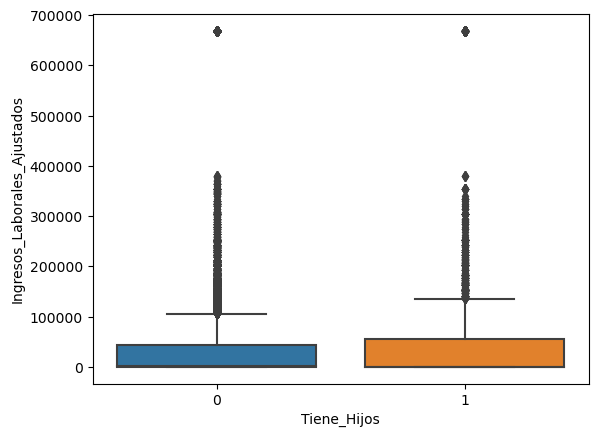

In [ ]:
#box plot de Ingresos_Laborales_Ajustados segun si tiene hijos o no
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Tiene_Hijos', y='Ingresos_Laborales_Ajustados', data=pov)
plt.show()

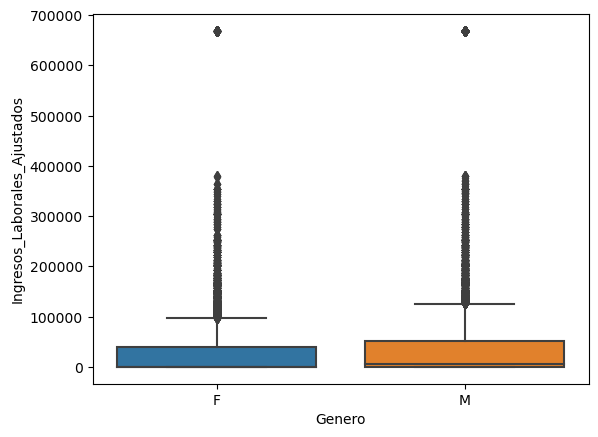

In [ ]:
#box plot de Ingresos_Laborales_Ajustados segun si tiene hijos o no
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Genero', y='Ingresos_Laborales_Ajustados', data=pov)
plt.show()

### filtro

In [ ]:
# mostrar outliers
pov[pov['Ingresos_Laborales_Ajustados'] < 20000]

,Borough,nivel_educativo,Etnicidad,Tiempo_Completo_Parcial,puesto_familiar,Horas_Trabajo_Promedio,Grupo_Edad,Lugar_Nacimiento,Estado_Empleo,Estado_Civil,...,Ingresos_Laborales_Ajustados,Gastos_Cuidado_Ninos,Gastos_Transporte,Gastos_Vivienda,Peso_Muestra,Gastos_Alimentacion,Ingresos_Antes_Impuestos,Estatus_Pobreza,Tiene_Hijos,Tiene_trabajo
2,Manhattan,3.0,White,3,1,2,65+,1,6.0,1,...,0.000,0.000,3840.8416,4766.7998,210,0.0,346479.190,2,0,0
5,Queens,4.0,Hispanic,1,0,1,18 - 64,5,6.0,1,...,17526.578,0.000,4954.1665,0.0000,430,0.0,28670.645,1,0,1
6,Queens,4.0,Hispanic,1,1,1,18 - 64,5,1.0,1,...,0.000,0.000,4954.1665,0.0000,466,0.0,28670.645,1,0,0
8,Brooklyn,4.0,Black,3,0,5,65+,4,6.0,2,...,0.000,0.000,0.0000,1378.6801,201,0.0,43664.480,2,0,0
10,Brooklyn,3.0,Asian,2,1,2,18 - 64,5,1.0,1,...,9117.873,0.000,1795.8000,9036.9600,60,0.0,80034.664,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68263,Brooklyn,3.0,Hispanic,3,6,1,18 - 64,2,3.0,1,...,0.000,0.000,3198.0000,10197.2000,80,0.0,121875.570,2,0,0
68265,Bronx,1.0,Hispanic,3,4,2,65+,5,3.0,1,...,0.000,0.000,1476.0000,1901.0400,222,0.0,45589.363,1,0,0
68266,Bronx,1.0,Hispanic,2,4,2,65+,5,1.0,1,...,6078.582,0.000,1476.0000,1901.0400,189,0.0,45589.363,1,0,1
68269,Brooklyn,NaN,Other,3,2,1,< 18,1,NaN,5,...,0.000,17781.383,2460.0000,7662.0000,102,0.0,222881.340,2,1,0


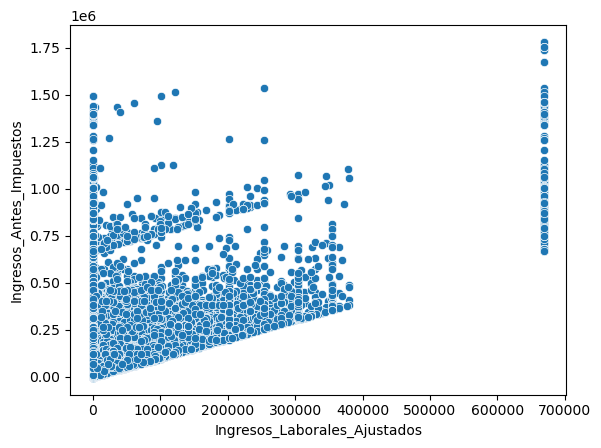

In [ ]:
# grafico de discpersion de Ingresos_Laborales_Ajustados y Gastos_Vivienda
sns.scatterplot(x='Ingresos_Laborales_Ajustados', y='Ingresos_Antes_Impuestos', data=pov)
plt.show()


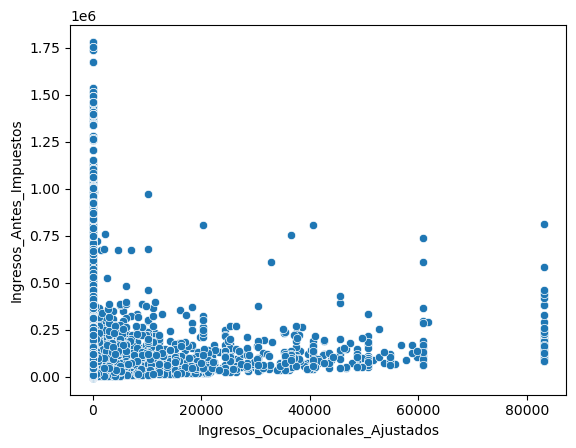

In [ ]:
sns.scatterplot(x='Ingresos_Ocupacionales_Ajustados', y='Ingresos_Antes_Impuestos', data=pov)
plt.show()


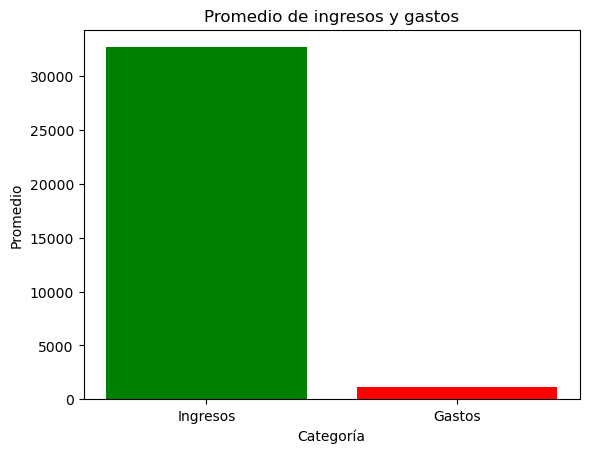

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcula el promedio de ingresos y gastos
ingresos_promedio = pov['Ingresos_Laborales_Ajustados'].mean()
gastos_promedio = pov['Gastos_Cuidado_Ninos'].mean()

# Definir las categorías y los valores
categorias = ['Ingresos', 'Gastos']
valores = [ingresos_promedio, gastos_promedio]

# Graficar las barras
plt.bar(categorias, valores, color=['green', 'red'])

# Agregar etiquetas, título y leyenda
plt.xlabel('Categoría')
plt.ylabel('Promedio')
plt.title('Promedio de ingresos y gastos')
plt.show()

In [ ]:
pov

,Borough,nivel_educativo,Etnicidad,Tiempo_Completo_Parcial,puesto_familiar,Horas_Trabajo_Promedio,Grupo_Edad,Lugar_Nacimiento,Estado_Empleo,Estado_Civil,...,Ingresos_Laborales_Ajustados,Gastos_Cuidado_Ninos,Gastos_Transporte,Gastos_Vivienda,Peso_Muestra,Gastos_Alimentacion,Ingresos_Antes_Impuestos,Estatus_Pobreza,Tiene_Hijos,Tiene_trabajo
0,Brooklyn,4.0,Hispanic,1,0,2,18 - 64,1,1.0,5,...,127650.220,0.000,1722.0000,2642.8000,95,0.0,127650.220,2,0,1
1,Manhattan,4.0,White,1,0,2,18 - 64,1,1.0,1,...,182357.450,0.000,3840.8416,4766.7998,181,0.0,346479.190,2,0,1
2,Manhattan,3.0,White,3,1,2,65+,1,6.0,1,...,0.000,0.000,3840.8416,4766.7998,210,0.0,346479.190,2,0,0
3,Brooklyn,1.0,White,1,0,1,65+,4,1.0,1,...,91178.727,0.000,0.0000,3218.8000,62,0.0,155003.840,2,0,1
4,Brooklyn,1.0,White,1,1,1,18 - 64,4,1.0,1,...,36471.492,0.000,0.0000,3218.8000,71,0.0,155003.840,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68268,Brooklyn,4.0,Asian,1,1,1,18 - 64,1,1.0,1,...,131702.610,17781.383,2460.0000,7662.0000,129,0.0,222881.340,2,1,1
68269,Brooklyn,NaN,Other,3,2,1,< 18,1,NaN,5,...,0.000,17781.383,2460.0000,7662.0000,102,0.0,222881.340,2,1,0
68270,Staten Island,4.0,White,1,0,1,18 - 64,1,1.0,5,...,42550.074,0.000,5672.1001,2047.9600,93,945.0,64838.207,2,0,1
68271,Staten Island,4.0,White,1,4,1,18 - 64,4,1.0,1,...,22288.135,0.000,5672.1001,2047.9600,69,945.0,64838.207,2,0,1


In [ ]:
pov.columns

Index(['Borough', 'nivel_educativo', 'Etnicidad', 'Tiempo_Completo_Parcial',
       'puesto_familiar', 'Horas_Trabajo_Promedio', 'Grupo_Edad',
       'Lugar_Nacimiento', 'Estado_Empleo', 'Estado_Civil',
       'Ingresos_Ocupacionales_Ajustados', 'Genero',
       'Ingresos_Laborales_Ajustados', 'Gastos_Cuidado_Ninos',
       'Gastos_Transporte', 'Gastos_Vivienda', 'Peso_Muestra',
       'Gastos_Alimentacion', 'Ingresos_Antes_Impuestos', 'Estatus_Pobreza',
       'Tiene_Hijos', 'Tiene_trabajo'],
      dtype='object')

<Axes: title={'center': 'Ingresos_Laborales_Ajustados'}, xlabel='Borough'>

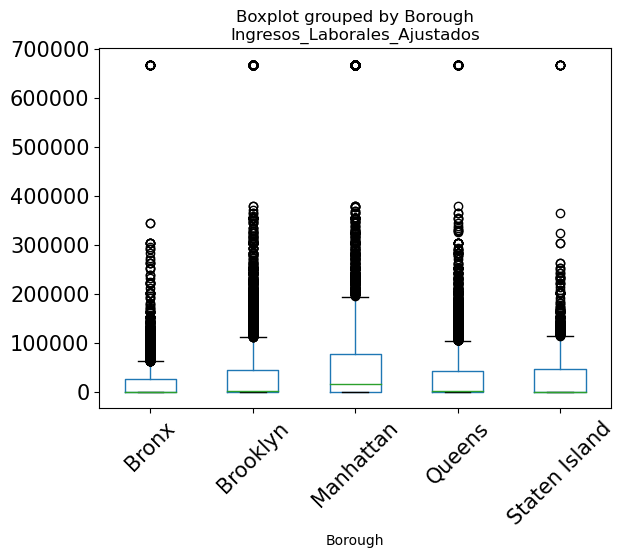

In [ ]:
# box plot de Ingresos_Laborales_Ajustados
pov.boxplot(column='Ingresos_Laborales_Ajustados',
            by='Borough',
            grid=False,
            rot=45, fontsize=15)

In [ ]:
# guardar el archivo
pov.to_csv('dataLimpia/pobreza_limpio.csv', index=False)